In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import os
#rcParams.update(params)

from Analysis import Astro_analysis
from Astro import Astro_multi_compartment
from Astro_morphology import Astrocyte_morphology, Process, Connect
from helper_plots import *
from Parameters import p
import Stimulus
from Stimulus_gen import Stimulus_gen

#### 1. Sealed end

In [2]:
# define morphology
p1 = Process(end_condition = 'sealed_end')
morpho = Connect([p1])
morpho.no_connection()

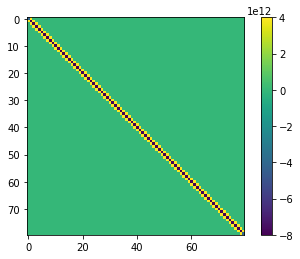

In [3]:
plt.imshow(morpho.conn_matrix, interpolation = 'nearest')
plt.colorbar()

In [4]:
# ratio of internal calcium stores
p['ratio'] = 0.15 * np.exp(-0.002*(1**2.32))

In [5]:
# stimulus
p['time'] = 200
p['tstart'] = 45
p['tstop'] = 55

# generate stimulus
glut_conc = 0.1
stim = Stimulus_gen(morpho.N, p['time'], p['dt'], 
                          p['tstart'], p['tstop'], 
                          p['input_length'], morpho.length, glut_conc)
stim.generate_stimulus()

In [6]:
# simulation
p['I_GluT_max'] = 4
p['P_max'] = 0.4 * 1.52/p['F'] 
p['D_C'] = 0.223 * 1e-11 #meter**2 * second **-1

# simulate system
astro = Astro_multi_compartment(params = p, model_type='NKV',
                                stimulus = stim.glut_stimulus, morpho = morpho)

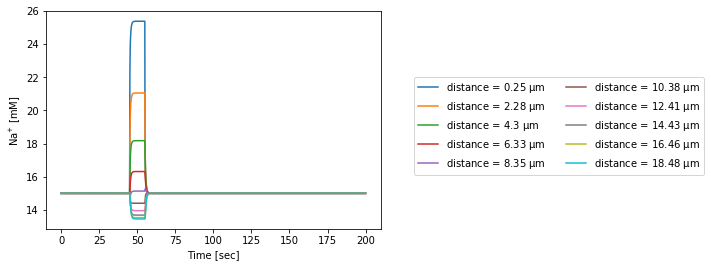

In [7]:
plot_time_series_single(morpho.N, astro.time, 
                        astro.dt, astro.Na, 
                        morpho.length, r'$\mathsf{Na^{+}\/\/[mM]}$')

#### 2. Open end

In [8]:
# define morphology
p1 = Process(end_condition = 'open_end')
morpho = Connect([p1])
morpho.no_connection()
morpho.conn_matrix.shape

(80, 82)

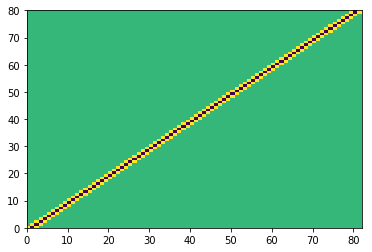

In [9]:
plt.pcolormesh(morpho.conn_matrix)

In [10]:
# stimulus
p['time'] = 200
p['tstart'] = 45
p['tstop'] = 55

# generate stimulus
glut_conc = 0.1
stim = Stimulus_gen(morpho.N, p['time'], p['dt'], 
                          p['tstart'], p['tstop'], 
                          p['input_length'], morpho.length, glut_conc)
stim.generate_stimulus()

In [11]:
# simulation
p['I_GluT_max'] = 4
p['P_max'] = 0.4 * 1.52/p['F'] 
p['D_C'] = 0.223 * 1e-11 #meter**2 * second **-1

# simulate system
astro = Astro_multi_compartment(params = p, model_type='NKV',
                                stimulus = stim.glut_stimulus, morpho = morpho)

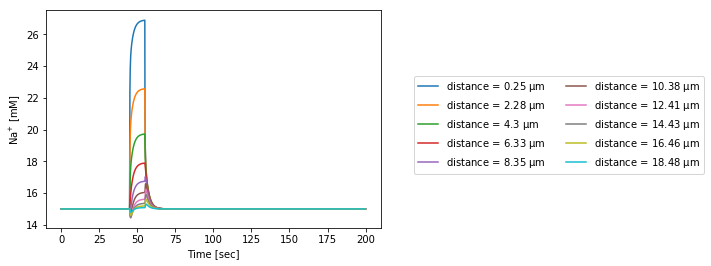

In [12]:
plot_time_series_single(morpho.N, astro.time, 
                        astro.dt, astro.Na, 
                        morpho.length, r'$\mathsf{Na^{+}\/\/[mM]}$')